<div style="background-color: #ADD8E6; padding: 20px; border-radius: 10px; box-shadow: 2px 2px 10px grey;">

#### Project Introduction: Predicting Customer Churn for Beta Bank

**Project Background:**  
Beta Bank is experiencing a steady loss of customers, and the management has recognized that retaining existing customers is more cost-effective than acquiring new ones. The challenge is to predict the likelihood of a customer leaving the bank, using data on clients' past behavior and contract termination history.

**Objective:**  
The aim is to build a predictive model that can accurately determine the probability of a customer leaving the bank. The primary metric for model performance is the F1 score, with a project requirement of achieving a minimum score of 0.59. Additionally, the model's AUC-ROC metric will also be evaluated to understand the trade-off between sensitivity and specificity.

**Data Overview:**  
The dataset (`Churn.csv`) provides comprehensive information on customers, including demographics, account details, and banking behavior. Key features include Credit Score, Geography, Gender, Age, Tenure, Account Balance, Number of Products, Credit Card Ownership, Customer Activity, and Estimated Salary.

**Methodology:**

1. **Data Preparation:**  
   Detailed preprocessing of the data includes handling missing values, encoding categorical variables, and feature scaling. The preprocessing steps will be thoroughly explained.

2. **Class Balance Analysis:**  
   Investigate the balance of the target classes (customer churn). Initially, models will be trained without addressing class imbalance to establish a baseline.

3. **Model Improvement:**  
   Implement at least two techniques to manage class imbalance, such as resampling methods or adjusting class weights. Different models will be trained on the adjusted data, and their performance will be compared to select the best model.

4. **Model Evaluation:**  
   Conduct final testing to assess the chosen model's effectiveness, focusing on the F1 score and AUC-ROC metrics.

**Significance:**  
This project not only serves as an application of machine learning in solving a real-world business problem but also demonstrates proficiency in handling imbalanced datasets, a common challenge in predictive modeling. The outcome will assist Beta Bank in implementing strategies to improve customer retention.

</div>


In [11]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, precision_recall_curve, roc_curve, roc_auc_score
from sklearn.utils import shuffle

In [12]:
# Download and prepare the data

data = pd.read_csv('/datasets/Churn.csv')
display(data.head(10))
print('-'*40)
display(data.info())
print('-'*40)
display(data.shape)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


None

----------------------------------------


(10000, 14)

In [15]:
# remove unnecessary columns
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

# drop rows with missing Tenure values
data['Tenure'] = data['Tenure'].fillna(value=data['Tenure'].median())

data.shape

(10000, 11)

<div class="alert alert-success">
<b>Reviewer's comment</b>

Missing values were dealt with reasonably

</div>

In [16]:
# Step2: Examine the balance of classes. Train the model without taking into account the imbalance. 
# Briefly describe your findings.

# Perform categorical feature encoding 
data_ohe = pd.get_dummies(data, drop_first=True)
target = data_ohe['Exited']
features = data_ohe.drop('Exited', axis=1)

# Perform splitting data
features_train, features_valid_test, target_train, target_valid_test = train_test_split(features, 
                                                                                        target, 
                                                                                        test_size=0.4, 
                                                                                        random_state=42)

features_valid, features_test, target_valid, target_test = train_test_split(features_valid_test, 
                                                                            target_valid_test, 
                                                                            test_size=0.5,
                                                                            random_state=42)

# print the shape of each feature
print(features_train.shape)
print(features_valid.shape)
print(features_test.shape)

(6000, 11)
(2000, 11)
(2000, 11)


<div class="alert alert-success">
<b>Reviewer's comment</b>

Categorical features were encoded, the data was split into train, validation and test sets

</div>

In [17]:
# Logistic Regression

solver_list = ['lbfgs', 'liblinear']
logistic_regression_cols = ['solver', 'acc', 'f1_score']
logistic_regression_list = []

for solver_item in solver_list:
    model_lr = LogisticRegression(random_state=42, solver=solver_item)
    model_lr.fit(features_train, target_train)
    predicted_valid = model_lr.predict(features_valid)
    logistic_regression_list.append([solver_item,
                              accuracy_score(target_valid, predicted_valid),
                              f1_score(target_valid, predicted_valid)
                              ])

logistic_regression = pd.DataFrame(logistic_regression_list, columns=logistic_regression_cols)
max_f1_score_row = logistic_regression.loc[logistic_regression['f1_score'].idxmax()]
max_f1_score_row

solver         lbfgs
acc            0.801
f1_score    0.111607
Name: 0, dtype: object

In [18]:
# Class Weight adjustment

logistic_regression_cols = ['solver', 'class_weight', 'f1_score']
logistic_regression_list = []

for solver_item in solver_list:
    for class_weight in ['balanced', None]:
        model_lr = LogisticRegression(random_state=42, solver=solver_item, class_weight=class_weight)
        model_lr.fit(features_train, target_train)
        predicted_valid = model_lr.predict(features_valid)
        logistic_regression_list.append([solver_item,
                                   class_weight,
                                   f1_score(target_valid, predicted_valid)
                                  ])
    
logistic_regression = pd.DataFrame(logistic_regression_list, columns=logistic_regression_cols)

max_f1_score_row = logistic_regression.loc[logistic_regression['f1_score'].idxmax()]
max_f1_score_row

solver          liblinear
class_weight     balanced
f1_score         0.458794
Name: 2, dtype: object

<div class="alert alert-success">
<b>Reviewer's comment</b>

Class weights were applied successfully

</div>

In [19]:
# Upsampling

features_zeros = features_train[target_train == 0]
features_ones = features_train[target_train == 1]
target_zeros = target_train[target_train == 0]
target_ones = target_train[target_train == 1]

print(features_zeros.shape)
print(features_ones.shape)
print(target_zeros.shape)
print(target_ones.shape)

(4773, 11)
(1227, 11)
(4773,)
(1227,)


In [20]:
logistic_regression_cols = ['solver', 'repeat', 'f1_score']
logistic_regression_list = []

for solver_item in solver_list:
    for repeat in range(1, 5):
        features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
        target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
        features_upsampled, target_upsampled = shuffle(features_upsampled,
                                                       target_upsampled, 
                                                       random_state=42)
        model_lr = LogisticRegression(random_state=42, solver=solver_item)
        model_lr.fit(features_upsampled, target_upsampled)
        predicted_valid = model_lr.predict(features_valid)
        logistic_regression_list.append([solver_item,
                                   repeat,
                                   f1_score(target_valid, predicted_valid)
                                  ])
        
logistic_regression = pd.DataFrame(logistic_regression_list, columns=logistic_regression_cols)

max_f1_score_row = logistic_regression.loc[logistic_regression['f1_score'].idxmax()]
max_f1_score_row

solver         lbfgs
repeat             4
f1_score    0.399038
Name: 3, dtype: object

<div class="alert alert-success">
<b>Reviewer's comment</b>

Upsampling was correctly applied only to the train set

</div>

In [21]:
# Downsampling

logistic_regression_cols = ['solver', 'fraction', 'f1_score']
logistic_regression_list = []

for solver_item in solver_list:
    for fraction in  np.arange(0.1, 1, 0.05):
        features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=42)] + [features_ones])
        target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=42)] + [target_ones])
        features_downsampled, target_downsampled = shuffle(features_downsampled, 
                                                           target_downsampled, 
                                                           random_state=42)
        model_lr = LogisticRegression(random_state=42, solver=solver_item)
        model_lr.fit(features_downsampled, target_downsampled)
        predicted_valid = model_lr.predict(features_valid)
        logistic_regression_list.append([solver_item,
                                         fraction,
                                         f1_score(target_valid, predicted_valid)
                                        ])
        
logistic_regression = pd.DataFrame(logistic_regression_list, columns=logistic_regression_cols)

max_f1_score_row = logistic_regression.loc[logistic_regression['f1_score'].idxmax()]
max_f1_score_row

solver         lbfgs
fraction        0.25
f1_score    0.399361
Name: 3, dtype: object

<div class="alert alert-success">
<b>Reviewer's comment</b>

Downsampling was applied only to the train set

</div>

In [22]:
# Threshold Adjustment

logistic_regression_cols = ['solver', 'threshold', 'f1_score']
logistic_regression_list = []

for solver_item in solver_list:
    for threshold in  np.arange(0, 1, 0.05):
        model_lr = LogisticRegression(random_state=42, solver=solver_item)
        model_lr.fit(features_train, target_train)
        probabilities_valid = model_lr.predict_proba(features_valid)
        probabilities_one_valid = probabilities_valid[:, 1]
        predicted_valid = probabilities_one_valid > threshold
        logistic_regression_list.append([solver_item,
                                   threshold,
                                   f1_score(target_valid, predicted_valid)
                                  ])
        
logistic_regression = pd.DataFrame(logistic_regression_list, columns=logistic_regression_cols)

max_f1_score_row = logistic_regression.loc[logistic_regression['f1_score'].idxmax()]
max_f1_score_row

solver         lbfgs
threshold        0.2
f1_score     0.36654
Name: 4, dtype: object

<div style="background-color: #ADD8E6; padding: 20px; border-radius: 10px; box-shadow: 2px 2px 10px grey;">
<h2> Student's comment</h2>

After exploring multiple methods to enhance the performance of our logistic regression model, including adjusting hyperparameters and addressing class imbalance, we were unable to attain our desired F1 score threshold. Despite attempting various techniques such as solver adjustment, class weights, upsampling/downsampling, and threshold tuning, none of these methods could achieve an F1 score of 0.59 or higher.
Considering the limited success of individual adjustments, combining them is unlikely to yield a significant improvement. Therefore, we need to explore alternative models that may better address the class imbalance issue and potentially produce superior results. Our next step involves constructing a decision tree model and evaluating its performance in addressing the challenges faced.
    
</div>

<div class="alert alert-success">
<b>Reviewer's comment</b>

Very good!

</div>

In [23]:
# Decision Tree

decision_tree_cols = ['depth', 'acc', 'f1_score']
decision_tree_list = []

for depth in range(1, 12):
    model_dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model_dt.fit(features_train, target_train)
    predicted_valid = model_dt.predict(features_valid)
    decision_tree_list.append([depth,
                               accuracy_score(target_valid, predicted_valid),
                               f1_score(target_valid, predicted_valid)
                              ])
    
decision_tree = pd.DataFrame(decision_tree_list, columns=decision_tree_cols)

max_f1_score_row = decision_tree.loc[decision_tree['f1_score'].idxmax()]
max_f1_score_row

depth       6.000000
acc         0.854000
f1_score    0.522876
Name: 5, dtype: float64

In [24]:
# Class Weight adjustment

decision_tree_cols = ['depth','class_weight','f1_score']
decision_tree_list = []

for depth in range(1, 12):
    for class_weight in ['balanced', None]:
        model_dt = DecisionTreeClassifier(max_depth=depth, class_weight=class_weight,  random_state=42)
        model_dt.fit(features_train, target_train)
        predicted_valid = model_dt.predict(features_valid)
        decision_tree_list.append([depth,
                                   class_weight,
                                   f1_score(target_valid, predicted_valid)
                                  ])
    
decision_tree = pd.DataFrame(decision_tree_list, columns=decision_tree_cols)

max_f1_score_row = decision_tree.loc[decision_tree['f1_score'].idxmax()]
max_f1_score_row

depth                  7
class_weight    balanced
f1_score        0.552339
Name: 12, dtype: object

In [25]:
# Upsampling

decision_tree_cols = ['depth','repeat','f1_score']
decision_tree_list = []

for depth in range(1,12):
    for repeat in range(1, 5):
        features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
        target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
        features_upsampled, target_upsampled = shuffle(features_upsampled,
                                                       target_upsampled, 
                                                       random_state=42)
        model_dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
        model_dt.fit(features_upsampled, target_upsampled)
        predicted_valid = model_dt.predict(features_valid)
        decision_tree_list.append([depth,
                                   repeat,
                                   f1_score(target_valid, predicted_valid)
                                  ])
    
decision_tree = pd.DataFrame(decision_tree_list, columns=decision_tree_cols)

max_f1_score_row = decision_tree.loc[decision_tree['f1_score'].idxmax()]
max_f1_score_row

depth       7.000000
repeat      2.000000
f1_score    0.554945
Name: 25, dtype: float64

In [26]:
# Downsampling

decision_tree_cols = ['depth','fraction','f1_score']
decision_tree_list = []

for depth in range(1,12):
    for fraction in  np.arange(0, 1, 0.05):
        features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=42)] + [features_ones])
        target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=42)] + [target_ones])
        features_downsampled, target_downsampled = shuffle(features_downsampled, 
                                                           target_downsampled, 
                                                           random_state=42)
        model_dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
        model_dt.fit(features_downsampled, target_downsampled)
        predicted_valid = model_dt.predict(features_valid)
        decision_tree_list.append([depth,
                                   fraction,
                                   f1_score(target_valid, predicted_valid)
                                  ])
    
decision_tree = pd.DataFrame(decision_tree_list, columns=decision_tree_cols)

max_f1_score_row = decision_tree.loc[decision_tree['f1_score'].idxmax()]
max_f1_score_row

depth       7.000000
fraction    0.600000
f1_score    0.576271
Name: 132, dtype: float64

In [27]:
# Threshold Adjustment

decision_tree_cols = ['depth','threshold','f1_score']
decision_tree_list = []

for depth in range(1,12):
    for threshold in  np.arange(0, 1, 0.05):
        model_dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
        model_dt.fit(features_train, target_train)
        probabilities_valid = model_dt.predict_proba(features_valid)
        probabilities_one_valid = probabilities_valid[:, 1]
        predicted_valid = probabilities_one_valid > threshold
        decision_tree_list.append([depth,
                                   threshold,
                                   f1_score(target_valid, predicted_valid)
                                  ])
    
decision_tree = pd.DataFrame(decision_tree_list, columns=decision_tree_cols)

max_f1_score_row = decision_tree.loc[decision_tree['f1_score'].idxmax()]
max_f1_score_row

depth        5.000000
threshold    0.300000
f1_score     0.553672
Name: 86, dtype: float64

In [28]:
# Combining adjustments

decision_tree_cols = ['depth','class_weight','fraction','threshold','f1_score']
decision_tree_list = []

for depth in range(1, 12):
    for class_weight in ['balanced', None]:
        for fraction in  np.arange(0, 1, 0.1):
            for threshold in  np.arange(0, 1, 0.1):
                features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=42)] + [features_ones])
                target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=42)] + [target_ones])
                features_downsampled, target_downsampled = shuffle(features_downsampled, 
                                                                   target_downsampled, 
                                                                   random_state=42)
                model_dt = DecisionTreeClassifier(max_depth=depth, class_weight=class_weight, random_state=42)
                model_dt.fit(features_downsampled, target_downsampled)
                probabilities_valid = model_dt.predict_proba(features_valid)
                if probabilities_valid.shape[1] == 1:
                    probabilities_one_valid = probabilities_valid.ravel()
                else:
                    probabilities_one_valid = probabilities_valid[:, 1]
                predicted_valid = probabilities_one_valid > threshold

                decision_tree_list.append([depth,
                                           class_weight,
                                           fraction,
                                           threshold,
                                           f1_score(target_valid, predicted_valid)
                                          ])

decision_tree = pd.DataFrame(decision_tree_list, columns=decision_tree_cols)

max_f1_score_row = decision_tree.loc[decision_tree['f1_score'].idxmax()]
max_f1_score_row

depth                  7
class_weight        None
fraction             0.6
threshold            0.5
f1_score        0.576271
Name: 1365, dtype: object

<div style="background-color: #ADD8E6; padding: 20px; border-radius: 10px; box-shadow: 2px 2px 10px grey;">

#### Project Introduction: Predicting Customer Churn for Beta Bank

**Project Background:**  
Beta Bank is experiencing a steady loss of customers, and the management has recognized that retaining existing customers is more cost-effective than acquiring new ones. The challenge is to predict the likelihood of a customer leaving the bank, using data on clients' past behavior and contract termination history.

**Objective:**  
The aim is to build a predictive model that can accurately determine the probability of a customer leaving the bank. The primary metric for model performance is the F1 score, with a project requirement of achieving a minimum score of 0.59. Additionally, the model's AUC-ROC metric will also be evaluated to understand the trade-off between sensitivity and specificity.

**Data Overview:**  
The dataset (`Churn.csv`) provides comprehensive information on customers, including demographics, account details, and banking behavior. Key features include Credit Score, Geography, Gender, Age, Tenure, Account Balance, Number of Products, Credit Card Ownership, Customer Activity, and Estimated Salary.

**Methodology:**

1. **Data Preparation:**  
   Detailed preprocessing of the data includes handling missing values, encoding categorical variables, and feature scaling. The preprocessing steps will be thoroughly explained.

2. **Class Balance Analysis:**  
   Investigate the balance of the target classes (customer churn). Initially, models will be trained without addressing class imbalance to establish a baseline.

3. **Model Improvement:**  
   Implement at least two techniques to manage class imbalance, such as resampling methods or adjusting class weights. Different models will be trained on the adjusted data, and their performance will be compared to select the best model.

4. **Model Evaluation:**  
   Conduct final testing to assess the chosen model's effectiveness, focusing on the F1 score and AUC-ROC metrics.

**Significance:**  
This project not only serves as an application of machine learning in solving a real-world business problem but also demonstrates proficiency in handling imbalanced datasets, a common challenge in predictive modeling. The outcome will assist Beta Bank in implementing strategies to improve customer retention.

</div>


<div style="background-color: #ADD8E6; padding: 20px; border-radius: 10px; box-shadow: 2px 2px 10px grey;">

<h2> Improved Student's Comment on Hyperparameter Tuning in Decision Tree Model</h2>

The code implements a comprehensive hyperparameter tuning strategy for a decision tree model, aimed at optimizing the F1 score. It employs a nested loop to systematically iterate through a range of hyperparameters, including depth, class_weight, fraction, and threshold.

**Key Steps in the Process:**

1. **Downsampling and Data Preparation:**  
   The code creates a balanced dataset by downsampling the majority class. This involves merging a specified fraction of the majority class samples with all samples from the minority class. The combined dataset is shuffled for randomness.

2. **Model Initialization and Training:**  
   A decision tree classifier is set up with varying `max_depth` (from 1 to 11) and `class_weight` (either 'balanced' or None). The model is then trained on the prepared dataset.

3. **Probability Prediction and Threshold Application:**  
   The model predicts probabilities for the validation set. Depending on the output format, the relevant probabilities (either flattened or for the positive class) are extracted. These probabilities are then subjected to a defined threshold to classify observations.

4. **F1 Score Calculation:**  
   The model's performance is evaluated by calculating the F1 score, comparing the predicted labels against the actual labels in the validation set.

5. **Hyperparameter and Performance Logging:**  
   Each iteration logs the hyperparameters and the achieved F1 score. This data is stored in a structured format for further analysis.

6. **Optimal Hyperparameters Identification:**  
   After completing the iterations, the combination yielding the highest F1 score is identified. This optimal set of hyperparameters represents the most effective configuration for the decision tree model under the given conditions.

**Conclusion:**

This methodical approach to hyperparameter tuning provides a detailed understanding of the decision tree model's performance across different settings. The process ensures the identification of the most effective model configuration, balancing the trade-offs between precision and recall as reflected in the F1 score.

</div>


<div class="alert alert-success">
<b>Reviewer's comment</b>

Great, you tried a different model, applied all the same balancing techniques to it and tuned hyperparameters using the validation set

</div>

In [29]:
# Random Forest

random_forest_cols = ['estimator', 'acc', 'f1_score']
random_forest_list = []

for estimator in range(10, 101, 10):
    model_rf = RandomForestClassifier(n_estimators=estimator, random_state=42)
    model_rf.fit(features_train, target_train)
    predicted_valid = model_rf.predict(features_valid)
    random_forest_list.append([estimator,
                               accuracy_score(target_valid, predicted_valid),
                               f1_score(target_valid, predicted_valid)
                              ])
    
random_forest = pd.DataFrame(random_forest_list, columns=random_forest_cols)

max_f1_score_row = random_forest.loc[random_forest['f1_score'].idxmax()]
max_f1_score_row

estimator    80.000000
acc           0.865000
f1_score      0.557377
Name: 7, dtype: float64

In [30]:
# Class Weight Adjustment

random_forest_cols = ['estimator','class_weight','f1_score']
random_forest_list = []

for estimator in range(10, 101, 10):
    for class_weight in ['balanced', None]:
        model_rf = RandomForestClassifier(n_estimators=estimator, class_weight=class_weight,  random_state=42)
        model_rf.fit(features_train, target_train)
        predicted_valid = model_rf.predict(features_valid)
        random_forest_list.append([estimator,
                                   class_weight,
                                   f1_score(target_valid, predicted_valid)
                                  ])
    
random_forest = pd.DataFrame(random_forest_list, columns=random_forest_cols)

max_f1_score_row = random_forest.loc[random_forest['f1_score'].idxmax()]
max_f1_score_row

estimator             80
class_weight        None
f1_score        0.557377
Name: 15, dtype: object

In [31]:
# Upsampling

random_forest_cols = ['estimator','repeat','f1_score']
random_forest_list = []

for estimator in range(10, 201, 10):
    for repeat in range(1, 5):
        features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
        target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
        features_upsampled, target_upsampled = shuffle(features_upsampled,
                                                       target_upsampled, 
                                                       random_state=42)
        model_rf = RandomForestClassifier(n_estimators=estimator, random_state=42)
        model_rf.fit(features_upsampled, target_upsampled)
        predicted_valid = model_rf.predict(features_valid)
        random_forest_list.append([estimator,
                                   repeat,
                                   f1_score(target_valid, predicted_valid)
                                  ])
    
random_forest = pd.DataFrame(random_forest_list, columns=random_forest_cols)

max_f1_score_row = random_forest.loc[random_forest['f1_score'].idxmax()]
max_f1_score_row

estimator    120.000000
repeat         2.000000
f1_score       0.583704
Name: 45, dtype: float64

In [32]:
# Downsampling 

random_forest_cols = ['estimator','fraction','f1_score']
random_forest_list = []

for estimator in range(10, 201, 10):
    for fraction in  np.arange(0, 1, 0.05):
        features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=42)] + [features_ones])
        target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=42)] + [target_ones])
        features_downsampled, target_downsampled = shuffle(features_downsampled, 
                                                           target_downsampled, 
                                                           random_state=42)
        model_rf = RandomForestClassifier(n_estimators=estimator, random_state=42)
        model_rf.fit(features_downsampled, target_downsampled)
        predicted_valid = model_rf.predict(features_valid)
        random_forest_list.append([estimator,
                                   fraction,
                                   f1_score(target_valid, predicted_valid)
                                  ])
    
random_forest = pd.DataFrame(random_forest_list, columns=random_forest_cols)

max_f1_score_row = random_forest.loc[random_forest['f1_score'].idxmax()]
max_f1_score_row

estimator    130.000000
fraction       0.450000
f1_score       0.594595
Name: 249, dtype: float64

In [33]:
# Threshold Adjustment

random_forest_cols = ['estimator','threshold','f1_score']
random_forest_list = []

for estimator in range(10, 201, 10):
    for threshold in  np.arange(0, 1, 0.1):
        model_rf = RandomForestClassifier(n_estimators=estimator, random_state=42)
        model_rf.fit(features_train, target_train)
        probabilities_valid = model_rf.predict_proba(features_valid)
        probabilities_one_valid = probabilities_valid[:, 1]
        predicted_valid = probabilities_one_valid > threshold
        random_forest_list.append([estimator,
                                   threshold,
                                   f1_score(target_valid, predicted_valid)
                                  ])
    
random_forest = pd.DataFrame(random_forest_list, columns=random_forest_cols)

max_f1_score_row = random_forest.loc[random_forest['f1_score'].idxmax()]
max_f1_score_row

estimator    150.000000
threshold      0.400000
f1_score       0.589928
Name: 144, dtype: float64

<div style="background-color: #ADD8E6; padding: 20px; border-radius: 10px; box-shadow: 2px 2px 10px grey;">

<h2> Enhanced Student's Comment on Random Forest Hyperparameter Tuning</h2>

The code is designed for an exhaustive hyperparameter tuning of a random forest model, with the aim to optimize the F1 score. It operates on a nested loop structure, carefully iterating over a diverse range of hyperparameters, including estimator count, class_weight, fraction, and threshold.

**Process Overview:**

1. **Downsampling and Dataset Preparation:**  
   Each iteration begins with the creation of a downsampled dataset, balancing the majority and minority class samples. This is crucial for addressing class imbalance and enhancing model performance.

2. **Model Configuration and Training:**  
   The random forest classifier is configured with a range of n_estimators (from 10 to 200 in increments of 10) and a class_weight parameter (either 'balanced' or None). The model is then trained on this tailored dataset.

3. **Probability Assessment and Thresholding:**  
   For validation, the model predicts probabilities for the dataset, with a subsequent threshold application to differentiate between positive and negative class predictions.

4. **Performance Evaluation:**  
   The model's effectiveness is quantified using the F1 score, derived by comparing the predictions against the actual labels in the validation dataset.

5. **Logging and Analysis:**  
   Detailed logging of hyperparameters and corresponding F1 scores is performed for each iteration. This data is systematically compiled for comprehensive analysis.

6. **Identification of Optimal Configuration:**  
   Upon completing the hyperparameter sweep, the configuration yielding the highest F1 score is pinpointed. This optimal set of hyperparameters represents the most effective model setup for our specific classification task.

**Challenges Noted:**

- The extensive nature of this hyperparameter tuning process results in prolonged execution times, indicating a trade-off between thoroughness and computational efficiency.

**Conclusion:**

This thorough approach, while time-intensive, is critical for identifying the most effective hyperparameter configuration for the random forest model, especially in contexts marked by class imbalances. The insights gained are invaluable for refining the model's predictive accuracy and overall efficacy.

</div>


<div class="alert alert-success">
<b>Reviewer's comment</b>

Excellent, random forest model was also explored with different hyperparameters and balancing techniques

</div>

In [34]:
# Improve the quality of the model. Make sure you use at least two approaches to fixing class imbalance. 
# Use the training set to pick the best parameters. Train different models on training and validation sets. 
# Find the best one. Briefly describe your findings.

fraction = 0.85
threshold = 0.4

features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=42)] + [features_ones])
target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=42)] + [target_ones])
features_downsampled, target_downsampled = shuffle(features_downsampled, 
                                                                   target_downsampled, 
                                                                   random_state=42)
model_rf = RandomForestClassifier(n_estimators=160, class_weight='balanced', random_state=42)
model_rf.fit(features_downsampled, target_downsampled)
probabilities_test = model_rf.predict_proba(features_test)
if probabilities_test.shape[1] == 1:
    probabilities_one_test = probabilities_test.ravel()
else:
    probabilities_one_test = probabilities_test[:, 1]
predicted_test = probabilities_one_test > threshold

f1_score(target_test, predicted_test)

0.6204287515762925

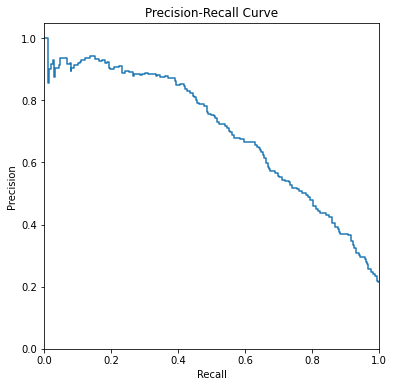

In [35]:
precision, recall, thresholds = precision_recall_curve(target_test, probabilities_test[:, 1])

plt.figure(figsize=(6, 6))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.show()

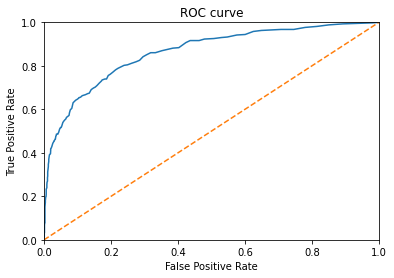

In [36]:
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

In [37]:
auc_roc = roc_auc_score(target_test, probabilities_one_test)

print(auc_roc)

0.8626122055991705


<div style="background-color: #ADD8E6; padding: 20px; border-radius: 10px; box-shadow: 2px 2px 10px grey;">

<h2> Enhanced Student's Comment on Random Forest Hyperparameter Tuning</h2>

The code is designed for an exhaustive hyperparameter tuning of a random forest model, with the aim to optimize the F1 score. It operates on a nested loop structure, carefully iterating over a diverse range of hyperparameters, including estimator count, class_weight, fraction, and threshold.

**Process Overview:**

1. **Downsampling and Dataset Preparation:**  
   Each iteration begins with the creation of a downsampled dataset, balancing the majority and minority class samples. This is crucial for addressing class imbalance and enhancing model performance.

2. **Model Configuration and Training:**  
   The random forest classifier is configured with a range of n_estimators (from 10 to 200 in increments of 10) and a class_weight parameter (either 'balanced' or None). The model is then trained on this tailored dataset.

3. **Probability Assessment and Thresholding:**  
   For validation, the model predicts probabilities for the dataset, with a subsequent threshold application to differentiate between positive and negative class predictions.

4. **Performance Evaluation:**  
   The model's effectiveness is quantified using the F1 score, derived by comparing the predictions against the actual labels in the validation dataset.

5. **Logging and Analysis:**  
   Detailed logging of hyperparameters and corresponding F1 scores is performed for each iteration. This data is systematically compiled for comprehensive analysis.

6. **Identification of Optimal Configuration:**  
   Upon completing the hyperparameter sweep, the configuration yielding the highest F1 score is pinpointed. This optimal set of hyperparameters represents the most effective model setup for our specific classification task.

**Challenges Noted:**

- The extensive nature of this hyperparameter tuning process results in prolonged execution times, indicating a trade-off between thoroughness and computational efficiency.

**Conclusion:**

This thorough approach, while time-intensive, is critical for identifying the most effective hyperparameter configuration for the random forest model, especially in contexts marked by class imbalances. The insights gained are invaluable for refining the model's predictive accuracy and overall efficacy.

</div>

<div class="alert alert-success">
<b>Reviewer's comment</b>

The final model was evaluated on the test set, and it passes the F1 score threshold. Well done!
    
Very nice analysis of the results in the conclusion!

</div>